In this notebook, we're going to provide motivation for an entirely new set of tools that we can use to extract important information from time-series data. This set of tools will be particularly useful for signals that capture periodic phenomena.

# Important: Run this code cell each time you start a new session!

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install os
!pip install librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Audio
import librosa as lr
import librosa.display

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
!wget -Ncnp https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv

--2023-07-06 01:23:35--  https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25931775 (25M) [text/plain]
Saving to: ‘id00b70b13.csv’

id00b70b13.csv      100%[===================>]  24.73M   492KB/s    in 51s     

2023-07-06 01:24:27 (492 KB/s) - ‘id00b70b13.csv’ saved [25931775/25931775]



In [4]:
df = pd.read_csv('id00b70b13.csv')

# Filter to only walking activity, which is given a code of 1
df = df[df['activity'] == 1]

# Process the time
df.rename(columns={'time_s': 'Time'}, inplace=True)
df = df[(df['Time']>=700) & (df['Time']<=710)]
df['Time'] = df['Time'] - df['Time'].min()

# Process the accel
df['Accel'] = np.sqrt(df['la_x']**2 + df['la_y']**2 + df['la_z']**2)*9.8

# Keep only crucial columns
keep_cols = ['Time', 'Accel']
df = df[keep_cols]
df.to_csv('walking.csv',index=False)

In [5]:
!wget -Ncnp https://physionet.org/files/sufhsdb/1.0.1/f1.wav

--2023-07-06 01:24:28--  https://physionet.org/files/sufhsdb/1.0.1/f1.wav
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2432684 (2.3M) [text/plain]
Saving to: ‘f1.wav’

f1.wav              100%[===================>]   2.32M   456KB/s    in 5.2s    

2023-07-06 01:24:34 (456 KB/s) - ‘f1.wav’ saved [2432684/2432684]



In [6]:
os.rename('f1.wav', 'heart_sound.wav')

# What Is Frequency-Domain Analysis?

Step trackers, ECGs, and speech audio are just some examples of real-world time series that have periodic characteristics. While we can write algorithms to be able to manually extract these characteristics of a signal, having a generalizable set of tools that would allow us to extract them more efficiently will enable us to better describe and differentiate such signals.

***Time-domain analysis*** refers to techniques techniques like those we discussed in the last session. They extract information from time-domain graphs that display how a signal changes over time. In contrast, ***frequency-domain analysis*** will allow us to extract information from frequency-domain graphs that display how the frequency content (i.e., periodic information) of a signal changes over time.

# Why Do We Need Something Fancy?

To motivate the importance of frequency-domain analysis, let's examine two different kinds of signals with periodic characteristics.

## Example 1: Step Counting with Motion Data

The first periodic signal is the motion data that we examined during our last session:

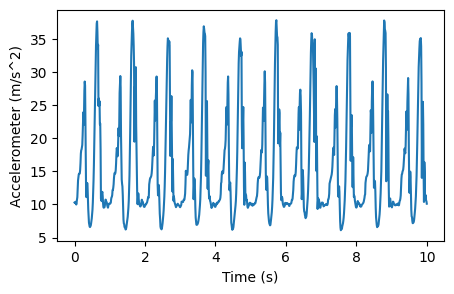

In [7]:
df = pd.read_csv('walking.csv')
plt.figure(figsize=(5,3))
plt.plot(df['Time'], df['Accel'])
plt.xlabel('Time (s)')
plt.ylabel('Accelerometer (m/s^2)')
plt.show()

If we wanted to measure the walking cadence of this person (i.e., the number of steps they took per second), we could refer back to the time-domain techniques we used in our last session. We would use peak detection to identify steps in the signal, and then we would calculate how many steps the person took within an interval. This is a time-domain approach to identifying walking cadence.

While this approach works, it requires an accurate peak detection algorithm that is good at detecting steps and ignoring insignificant peaks in the signal. We also had to make some assumptions about the window we used to detect peaks, and these assumptions may not generalize in all cases.

As we will see later, frequency-domain analysis will allow us to extract information like the dominant cadence (e.g, frequency) of the signal.

## Example 2: Heart Sound Audio

The second example of a periodic signal we will examine is an audio recording of a digital stethoscope being placed on a baby's heart:

In [8]:
display(Audio('heart_sound.wav', autoplay=True))

Output hidden; open in https://colab.research.google.com to view.

The visualization below shows part of this audio clip (starting at `:25`) as a time series. Play around with the `duration` slider in order to zoom in and out of the beginning of the audio clip.

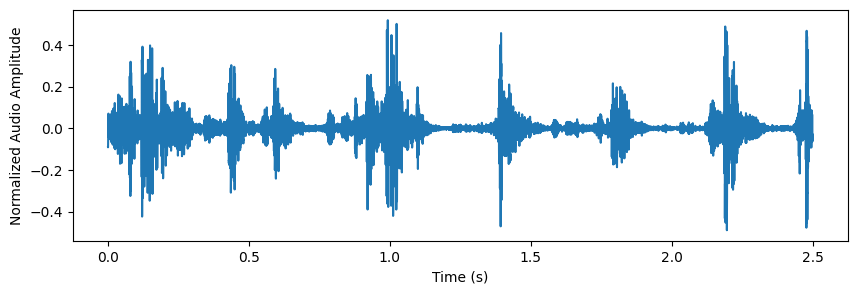

In [10]:
duration = 2.5 #@param {type:"slider", min:0.25, max:2.5, step:0.25}
y, sr = librosa.load('heart_sound.wav', sr=16000, mono=True,
                     offset=25, duration=duration)
time = np.arange(0, len(y))/sr

plt.figure(figsize=(10,3))
plt.plot(time, y)
plt.xlabel('Time (s)')
plt.ylabel('Normalized Audio Amplitude')
plt.show()

Notice that the signal contains many periodic changes over various time scales. When you examine the full clip, you'll see moments of high amplitude that correspond to sounds and momens of low amplitude that correspond to silence. When you zoom in, you'll see that the signal is actually oscillating at a tremendous rate.

Audio signals are oscillatory because they consist of rapidly varying air pressure waves. These oscillations are created by the vibrations of an object, such as a vocal cord or a musical instrument.

The rate of the oscillation corresponds to the pitch of the sound; the faster the oscillation, the higher the pitch. An instrument like a piano is really good at producing a sound with a single pitch. However, more complex sounds (e.g., musical chords, speech) are often composed of multiple pitches superimposed on one another at the same time.

Again, extracting the pitch(es) within an audio signal would be quite difficult using the time-domain techniques we have discussed so far, but frequency-domain analysis will make this task much simpler.

# Summary

This session will provide an overview of frequency-domain analysis so that we can better characterize periodic phenomena like motion and audio data.